#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# Create Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [33]:
def create_model():
    model = Sequential()

    #Con & MaxPool Layer1
    model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3), 
                     activation='relu', padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Conv & Max Pool Layer2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # create NN (Flattern, hidden, output layers)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))

    #model stacking check
    print(model.summary())
    return model

In [34]:
model_categorical_crossentropy = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

# Reload Pre-trained weight

In [36]:
def reload_weight(model, weight_filename):
    try:
        model.load_weights(weight_filename)
        print("Reload_weight_success!!")
        return model
    except :    
        print("Reload_weight_fail!!")
    

In [37]:
model_categorical_crossentropy = reload_weight(model_categorical_crossentropy, 'Day_071_HW.h5')

Reload_weight_success!!


# Model compile and training

In [39]:
model_categorical_crossentropy.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
record = model_categorical_crossentropy.fit(x=x_img_train_normalize, y=y_label_train_OneHot, batch_size=32, epochs=1, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/1
35000/35000 [==============================] - 373s 11ms/step - loss: 0.7203 - acc: 0.7460 - val_loss: 0.8903 - val_acc: 0.7064


In [40]:
model_categorical_crossentropy.save('Day_071_HW.h5')

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Learning Curve')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

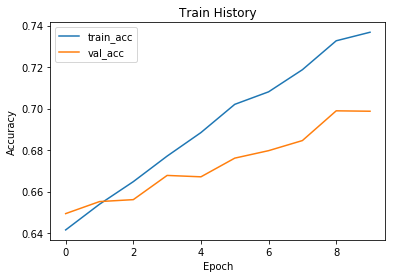

In [28]:
show_train_history(record, 'acc', 'val_acc')

# HW:
Try using different loss function `MSE, binary_crossentropy` and check Train/test accurancy and loss rate

In [41]:
model_MSE = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

In [42]:
# MSE
model_MSE.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
record = model_MSE.fit(x=x_img_train_normalize, y=y_label_train_OneHot, batch_size=32, epochs=5, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 345s 10ms/step - loss: 0.0903 - acc: 0.1103 - val_loss: 0.0897 - val_acc: 0.1401
Epoch 2/5
35000/35000 [==============================] - 376s 11ms/step - loss: 0.0897 - acc: 0.1319 - val_loss: 0.0894 - val_acc: 0.1808
Epoch 3/5
35000/35000 [==============================] - 360s 10ms/step - loss: 0.0892 - acc: 0.1508 - val_loss: 0.0891 - val_acc: 0.2013
Epoch 4/5
35000/35000 [==============================] - 328s 9ms/step - loss: 0.0888 - acc: 0.1722 - val_loss: 0.0887 - val_acc: 0.2339
Epoch 5/5
35000/35000 [==============================] - 440s 13ms/step - loss: 0.0881 - acc: 0.1914 - val_loss: 0.0882 - val_acc: 0.2556


In [45]:
record_MSE_2 = model_MSE.fit(x_img_train_normalize, y_label_train_OneHot, batch_size=32, epochs=5, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 329s 9ms/step - loss: 0.0873 - acc: 0.2093 - val_loss: 0.0875 - val_acc: 0.2477
Epoch 2/5
35000/35000 [==============================] - 387s 11ms/step - loss: 0.0864 - acc: 0.2252 - val_loss: 0.0867 - val_acc: 0.2741
Epoch 3/5
35000/35000 [==============================] - 364s 10ms/step - loss: 0.0854 - acc: 0.2428 - val_loss: 0.0859 - val_acc: 0.2867
Epoch 4/5
35000/35000 [==============================] - 360s 10ms/step - loss: 0.0844 - acc: 0.2593 - val_loss: 0.0851 - val_acc: 0.2980
Epoch 5/5
35000/35000 [==============================] - 321s 9ms/step - loss: 0.0835 - acc: 0.2712 - val_loss: 0.0843 - val_acc: 0.3028


In [ ]:
record_MSE_3 = model_MSE.fit(x)

In [43]:
model_binary_crossentropy = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
__________

In [46]:
# Binary CrossEntropy
model_binary_crossentropy.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
record_B = model_binary_crossentropy.fit(x=x_img_train_normalize, y=y_label_train_OneHot, batch_size=32, epochs=5, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 356s 10ms/step - loss: 0.3208 - acc: 0.9000 - val_loss: 0.3159 - val_acc: 0.9000
Epoch 2/5
35000/35000 [==============================] - 443s 13ms/step - loss: 0.3032 - acc: 0.9001 - val_loss: 0.2981 - val_acc: 0.9000
Epoch 3/5
15872/35000 [============>.................] - ETA: 4:18 - loss: 0.2914 - acc: 0.9002

KeyboardInterrupt: 